In [2]:
##### Regresión del Perceptrón Multicapa

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# semilla aleatoria para rerpoducibilidad
numpy.random.seed(7)

Using TensorFlow backend.
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [3]:
# cargamos el conjunto de datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
#dividimos datos en entreno y&amp;nbsp; datos para el test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [5]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [6]:
# remodelamos X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# crear y adaptar el modelo Perceptron multicapa
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)








Epoch 1/200
 - 0s - loss: 47055.8853
Epoch 2/200
 - 0s - loss: 41497.5510
Epoch 3/200
 - 0s - loss: 35821.1750
Epoch 4/200
 - 0s - loss: 30051.3541
Epoch 5/200
 - 0s - loss: 24229.0626
Epoch 6/200
 - 0s - loss: 18739.6368
Epoch 7/200
 - 0s - loss: 13743.5729
Epoch 8/200
 - 0s - loss: 9577.8456
Epoch 9/200
 - 0s - loss: 6320.3646
Epoch 10/200
 - 0s - loss: 3960.9297
Epoch 11/200
 - 0s - loss: 2415.2855
Epoch 12/200
 - 0s - loss: 1493.1496
Epoch 13/200
 - 0s - loss: 966.4056
Epoch 14/200
 - 0s - loss: 705.2098
Epoch 15/200
 - 0s - loss: 585.8043
Epoch 16/200
 - 0s - loss: 536.5956
Epoch 17/200
 - 0s - loss: 515.3175
Epoch 18/200
 - 0s - loss: 509.2941
Epoch 19/200
 - 0s - loss: 508.1800
Epoch 20/200
 - 0s - loss: 507.2039
Epoch 21/200
 - 0s - loss: 506.1280
Epoch 22/200
 - 0s - loss: 505.5807
Epoch 23/200
 - 0s - loss: 507.7909
Epoch 24/200
 - 0s - loss: 508.3785
Epoch 25/200
 - 0s - loss: 505.9819
Epoch 26/200
 - 0s - loss: 508.9330
Epoch 27/200
 - 0s - loss: 507.8864
Epoch 28/200

Epoch 190/200
 - 0s - loss: 508.9190
Epoch 191/200
 - 0s - loss: 509.1396
Epoch 192/200
 - 0s - loss: 510.8402
Epoch 193/200
 - 0s - loss: 518.5255
Epoch 194/200
 - 0s - loss: 512.8227
Epoch 195/200
 - 0s - loss: 507.2863
Epoch 196/200
 - 0s - loss: 514.0874
Epoch 197/200
 - 0s - loss: 513.5576
Epoch 198/200
 - 0s - loss: 516.5060
Epoch 199/200
 - 0s - loss: 520.8180
Epoch 200/200
 - 0s - loss: 517.7398


In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 502.99 MSE (22.43 RMSE)
Resultado del test: 2048.78 MSE (45.26 RMSE)


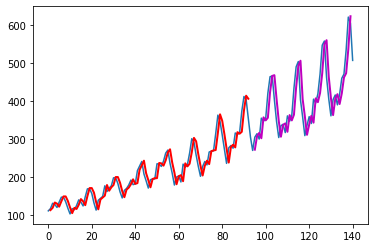

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(dataset)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()